In [100]:
!pip install -r ../requirements.txt


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [102]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [103]:
df_raw.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [104]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15440,46,admin.,single,university.degree,no,yes,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
17521,49,technician,single,university.degree,unknown,no,no,telephone,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18640,34,technician,divorced,unknown,no,yes,no,telephone,jul,thu,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
27205,55,technician,single,professional.course,no,yes,yes,telephone,nov,fri,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
13346,33,services,married,high.school,unknown,yes,yes,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
12043,33,services,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.947,5228.1,no
5979,36,management,married,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25379,58,blue-collar,married,basic.9y,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
23669,39,technician,married,university.degree,unknown,no,no,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
28894,37,blue-collar,married,basic.4y,no,no,yes,cellular,apr,fri,...,4,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [105]:
df_raw.shape

(41188, 21)

In [106]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [107]:
# No hay valores faltantes

## EDA

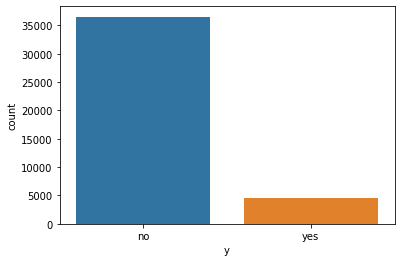

In [108]:
sns.countplot(x=df_raw['y'], data=df_raw.drop(columns=['y'],axis=1))
plt.show()

#Podemos ver que los datos de severamente desbalanceados con una inclinacion al valor 'no' en la columna target 'y'

In [109]:
X = df_raw.drop(columns=["y"],axis=1)
y = df_raw["y"]

In [110]:
numeric_features = X.select_dtypes(['float','int'])
categorical_features = X.select_dtypes(['object'])

print(numeric_features.columns)
print(categorical_features.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


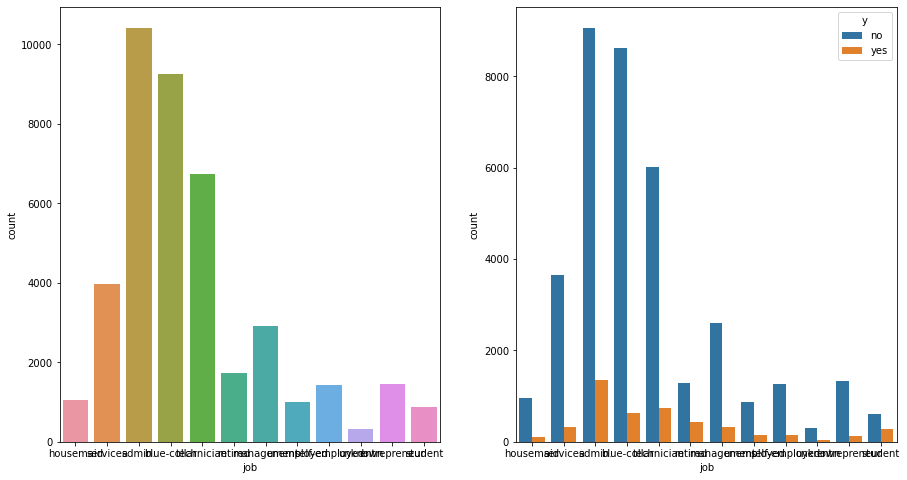

In [111]:
# Job

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='job',data=X,ax=axes[0])
plot=sns.countplot(x='job',data=X,hue=y,ax=axes[1])
plt.show()

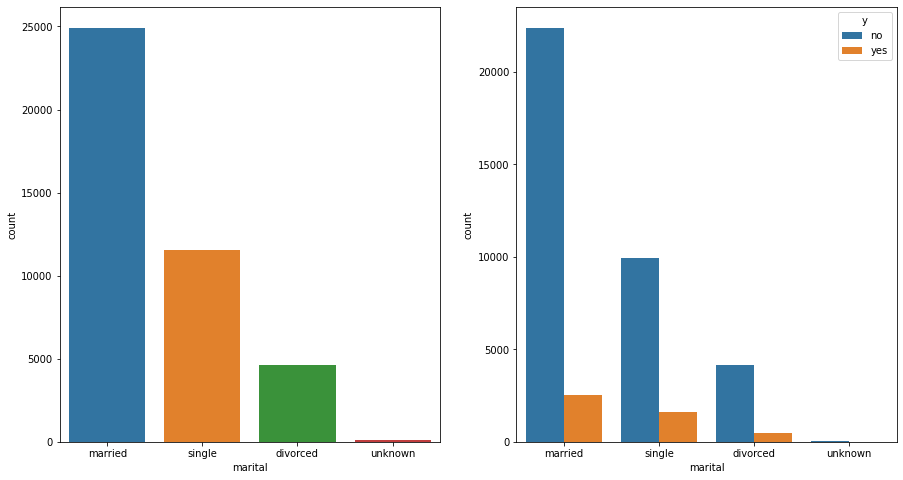

In [112]:
# Marital

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='marital',data=X,ax=axes[0])
plot=sns.countplot(x='marital',data=X,hue=y,ax=axes[1])
plt.show()

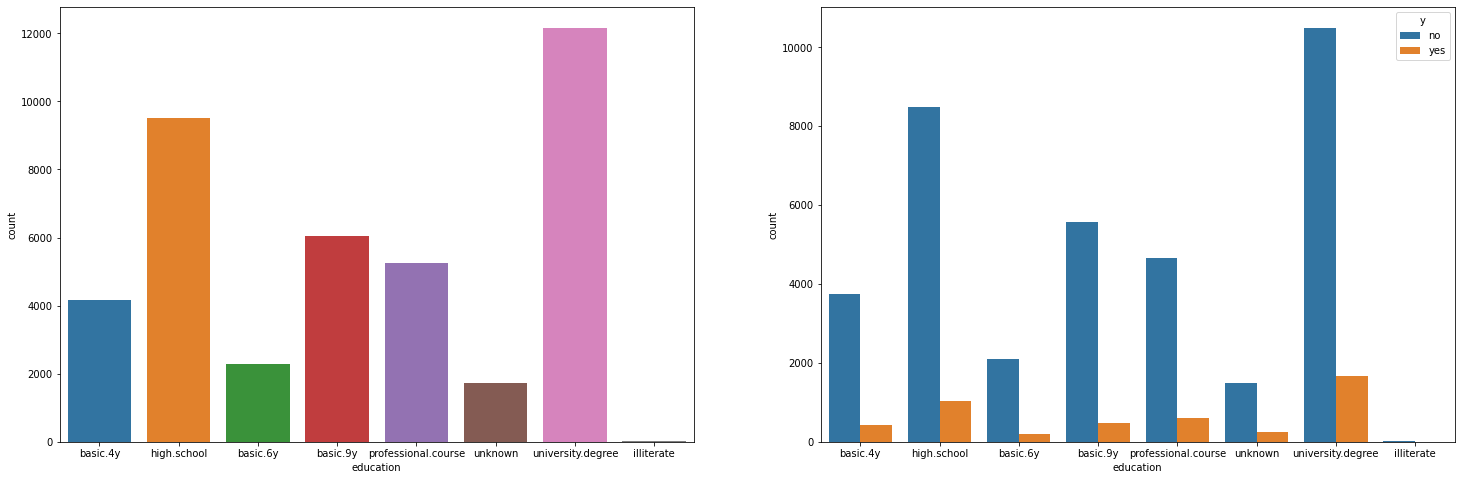

In [113]:
# Education

fig, axes = plt.subplots(1,2,figsize=(25,8))

sns.countplot(x='education',data=X,ax=axes[0])
plot=sns.countplot(x='education',data=X,hue=y,ax=axes[1])
plt.show()

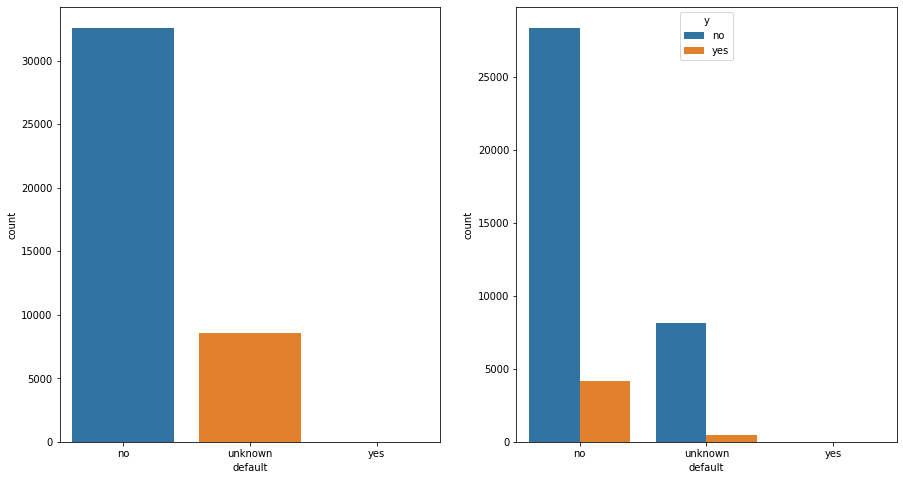

In [114]:
# Default

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='default',data=X,ax=axes[0])
plot=sns.countplot(x='default',data=X,hue=y,ax=axes[1])
plt.show()

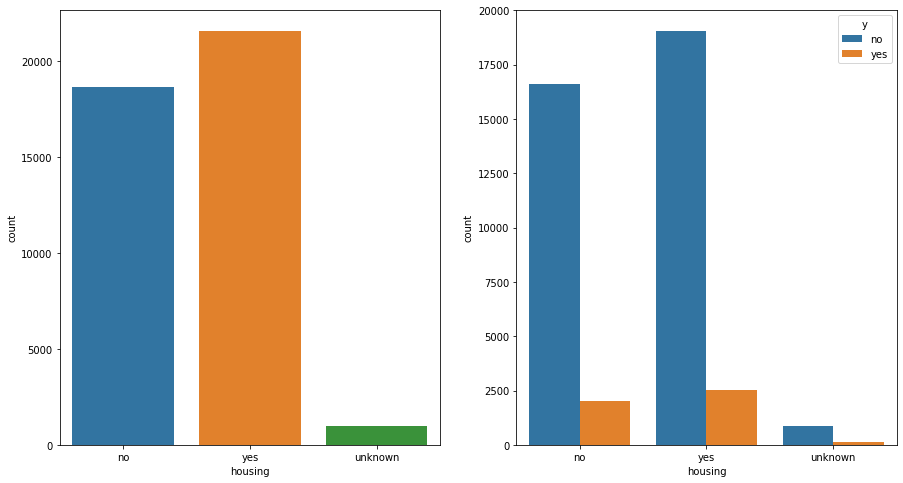

In [115]:
# Housing

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='housing',data=X,ax=axes[0])
plot=sns.countplot(x='housing',data=X,hue=y,ax=axes[1])
plt.show()

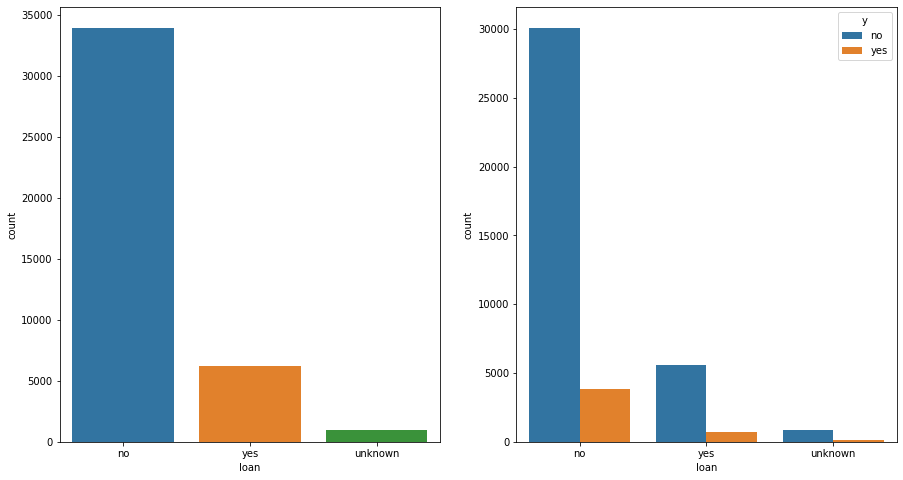

In [116]:
# Loan 

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='loan',data=X,ax=axes[0])
plot=sns.countplot(x='loan',data=X,hue=y,ax=axes[1])
plt.show()

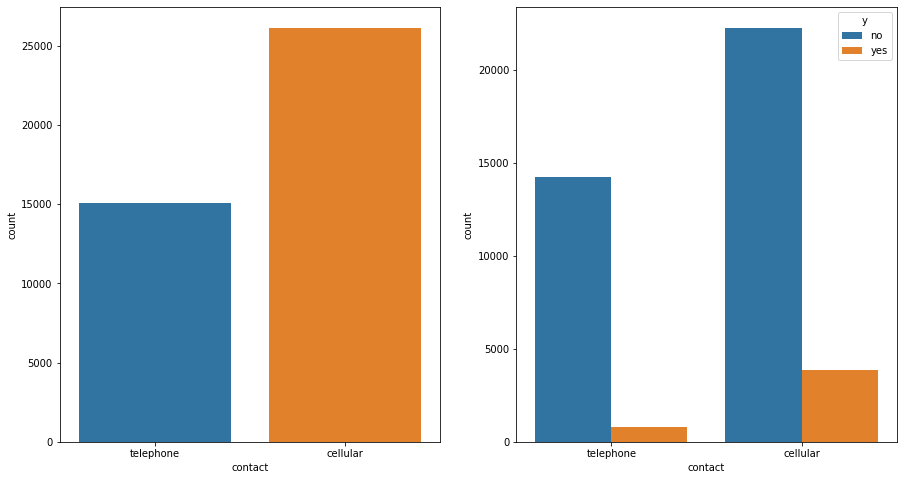

In [117]:
# Contact 

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='contact',data=X,ax=axes[0])
plot=sns.countplot(x='contact',data=X,hue=y,ax=axes[1])
plt.show()

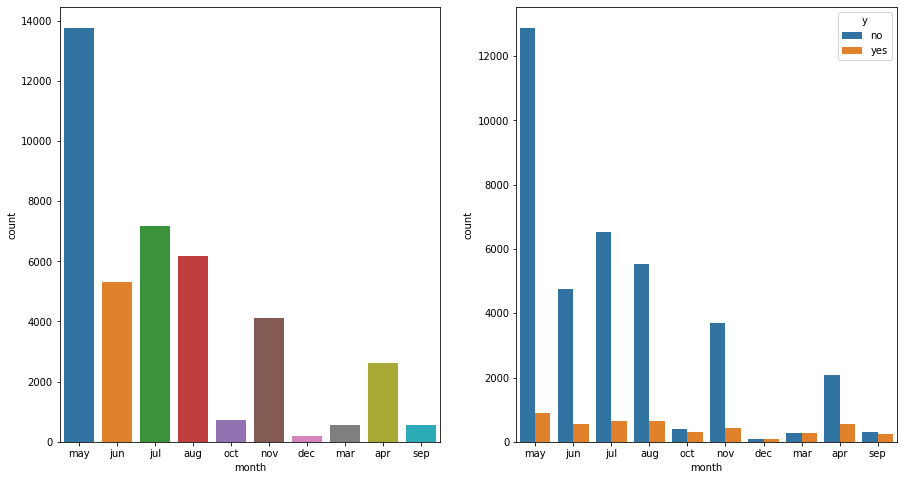

In [118]:
# Month 

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='month',data=X,ax=axes[0])
plot=sns.countplot(x='month',data=X,hue=y,ax=axes[1])
plt.show()

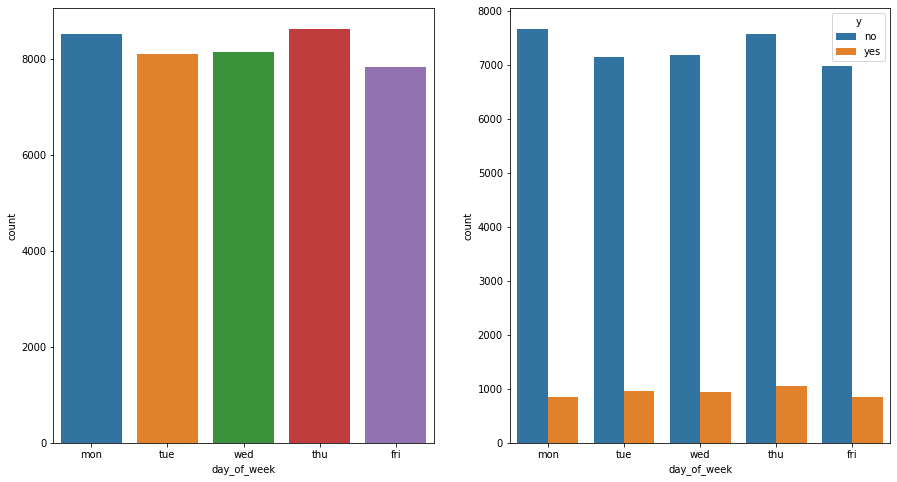

In [119]:
# Day_of_week 

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='day_of_week',data=X,ax=axes[0])
plot=sns.countplot(x='day_of_week',data=X,hue=y,ax=axes[1])
plt.show()

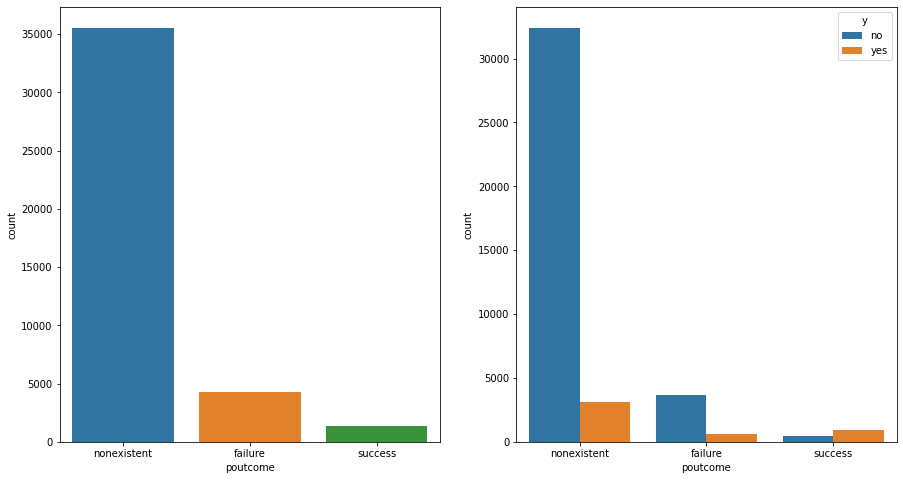

In [120]:
# Poutcome

fig, axes = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x='poutcome',data=X,ax=axes[0])
plot=sns.countplot(x='poutcome',data=X,hue=y,ax=axes[1])
plt.show()

Hay mucha gente que anteriormente nunca acepto o rechazo la propuesta, pero algunos de ellos si actualmente deicidieron hacer un term deposit

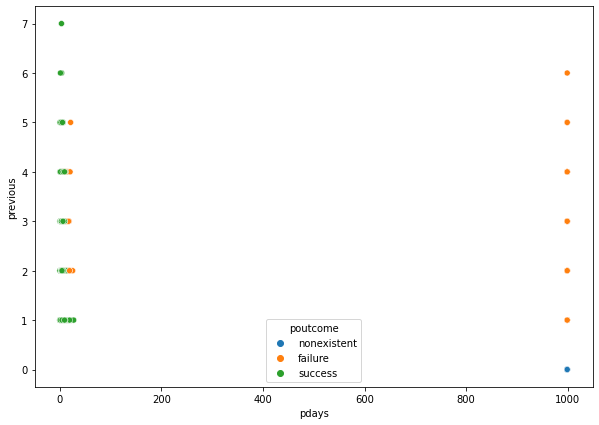

In [121]:
# Pdays vs previous

plt.figure(figsize=(10,7))
sns.scatterplot(x=X['pdays'], y=X['previous'], hue = X['poutcome'])
plt.show()

La variable pdays genera confusion con poutcome, ya que los puntos naranjas de la derecha nos indican que fueron fracasos contactados antes (por previous) y a su vez serian fracasos nunca contactados, por lo que se va a dropear la columna pdays y usar solo como criterio previous si el cliente fue contactado antes

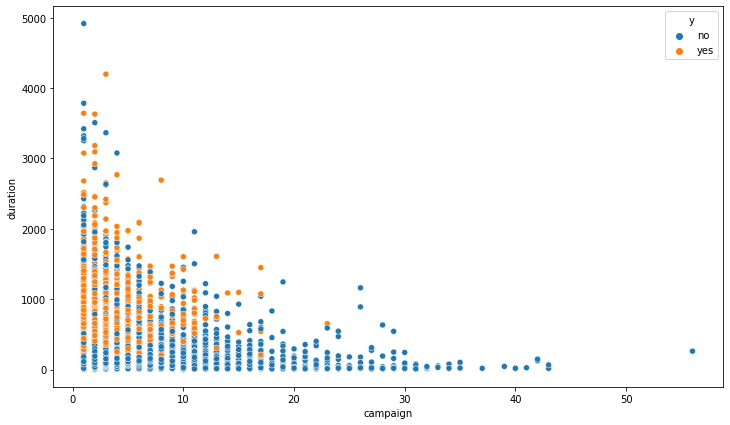

In [122]:
# Campaign vs duration

plt.figure(figsize=(12,7))
sns.scatterplot(x= X['campaign'], y= X['duration'], hue = y)
plt.show()

A menor cantidad de contactos y mayor duracion de llamada, mas probable de tener un outcome positivo

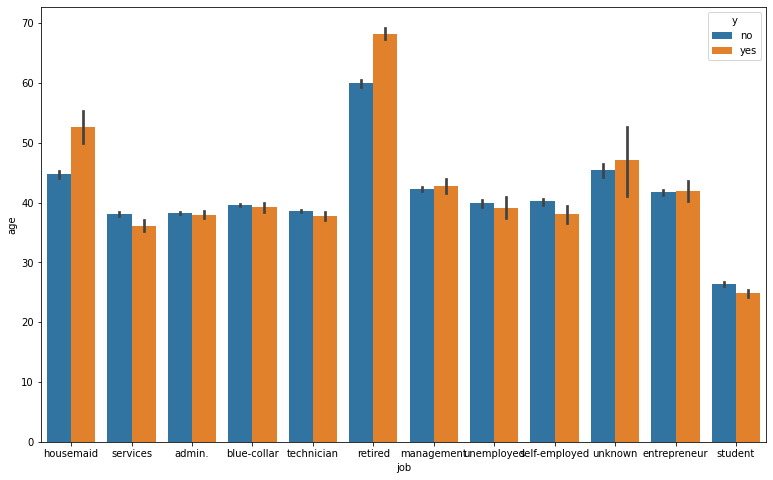

In [123]:
# Contraste entre job, age y el outcome

plt.figure(figsize=(13,8)) 
sns.barplot(x= X['job'], y= X['age'], hue= y)
plt.show()

Empleadas domesticas de aporximadamente 50 años y jubilados de aproximadamente 65 años son los grupos con mayor indice de aceptar la propuesta

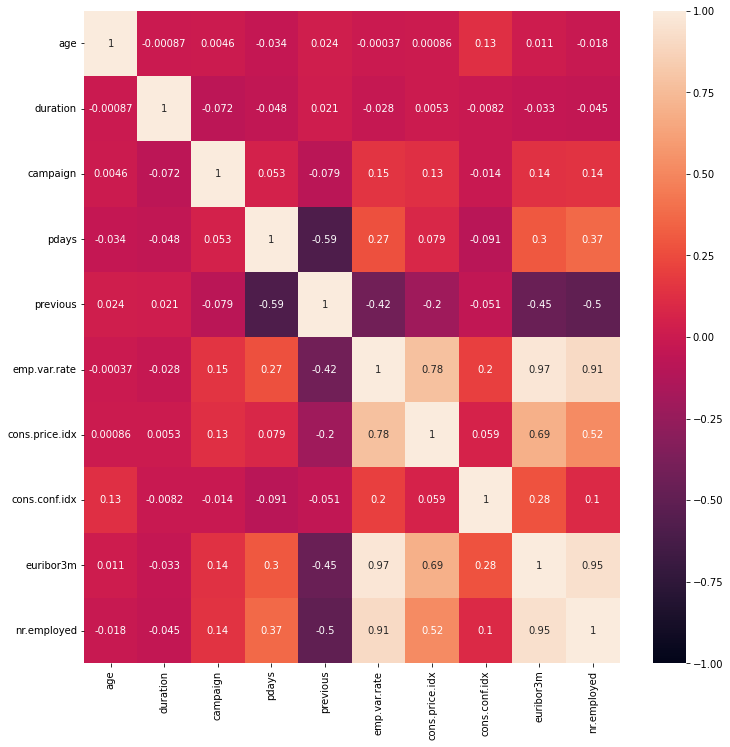

In [124]:
#Chequeamos los features mas relacionados entre si

plt.figure(figsize=(12,12))
sns.heatmap(df_raw.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

Pdays se va a dropear, asi que se elimina esa alta correlacion negativa con previous.
Se van a ddropear tambien las freatures emp.var.rate y euriborn3m por presentar alta correlacion positiva con otras variables

## Limpieza

In [125]:
df = df_raw.copy()

In [126]:
df.describe(include="O") 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [127]:
#Cambiamos los unknown por la mode de la columna 
for columns in df.select_dtypes(include="object").columns:
    df[columns] = np.where((df[columns] == "unknown"),df[columns].mode(),df[columns])

In [128]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,25008,13899,41185,22566,34940,26144,13769,8623,35563,36548


In [129]:
#Dropeamos las features con una correlacion cercana o mayor a 0.8
X = X.drop(columns=["euribor3m","emp.var.rate"],axis=1)
df = df.drop(columns=["euribor3m","emp.var.rate"],axis=1)

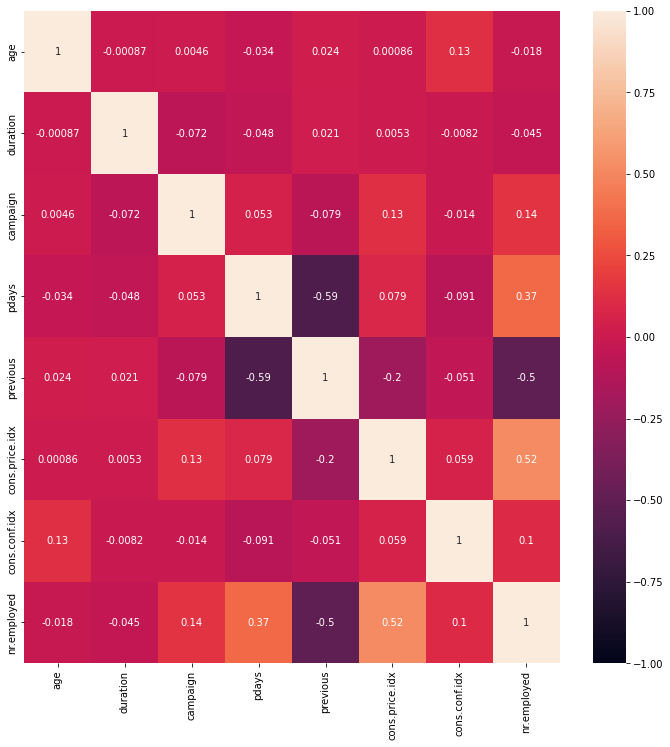

In [130]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

Text(0.5, 1.0, 'nr.employed')

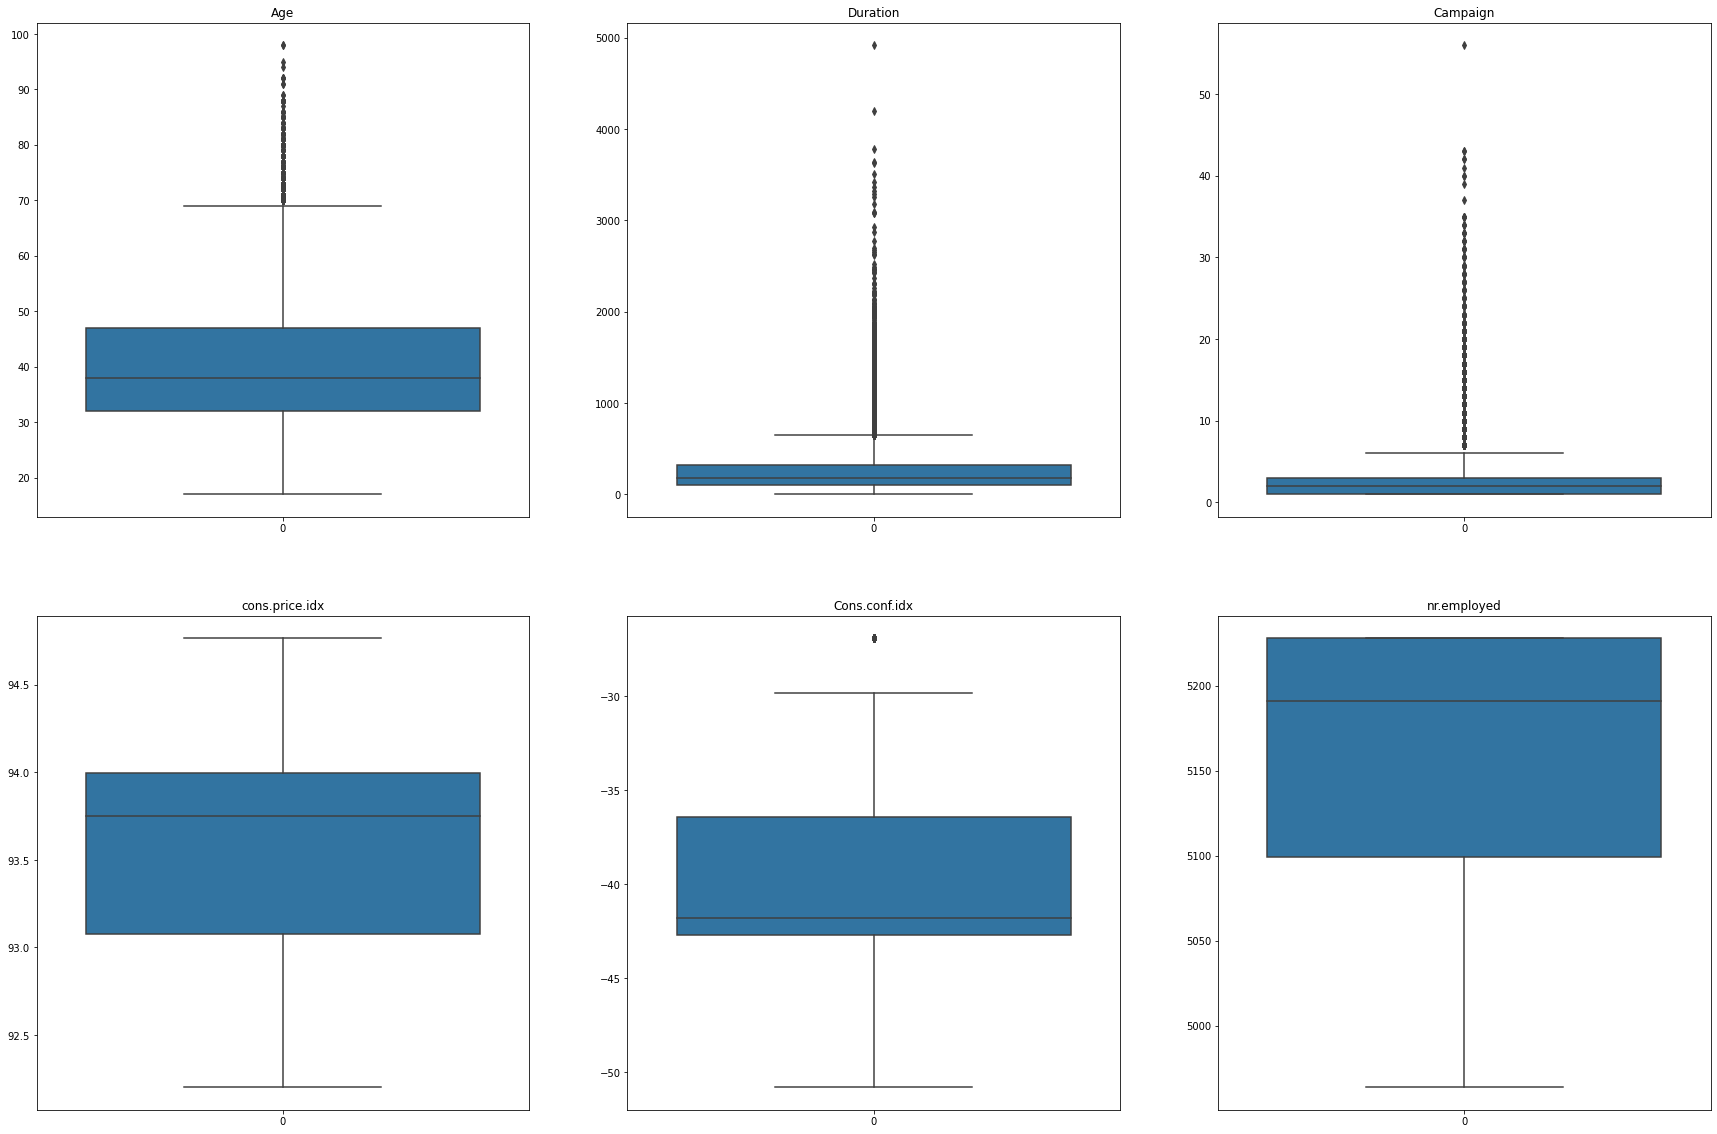

In [131]:
fig, axes = plt.subplots(2,3,figsize=(30, 20))

# ['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

sns.boxplot(data=X['age'],ax=axes[0][0])
axes[0][0].set_title('Age')

sns.boxplot(data=X['duration'],ax=axes[0][1])
axes[0][1].set_title('Duration')

sns.boxplot(data=X['campaign'],ax=axes[0][2])
axes[0][2].set_title('Campaign')

sns.boxplot(data=X['cons.price.idx'],ax=axes[1][0])
axes[1][0].set_title('cons.price.idx')

sns.boxplot(data=X['cons.conf.idx'],ax=axes[1][1])
axes[1][1].set_title('Cons.conf.idx')

sns.boxplot(data=X['nr.employed'],ax=axes[1][2])
axes[1][2].set_title('nr.employed')


In [132]:
features_outliers = ['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

for feature in features_outliers:
    stat = df[feature].describe()
    IQR = stat['75%'] - stat['25%']
    superior = stat['75%'] + IQR*1.5
    inferior = stat['25%'] - IQR*1.5

    df[feature] = df[feature].apply(lambda x: x if (superior >= x) else None)

In [133]:
df = df.dropna()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35176 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35176 non-null  float64
 1   job             35176 non-null  object 
 2   marital         35176 non-null  object 
 3   education       35176 non-null  object 
 4   default         35176 non-null  object 
 5   housing         35176 non-null  object 
 6   loan            35176 non-null  object 
 7   contact         35176 non-null  object 
 8   month           35176 non-null  object 
 9   day_of_week     35176 non-null  object 
 10  duration        35176 non-null  float64
 11  campaign        35176 non-null  float64
 12  pdays           35176 non-null  int64  
 13  previous        35176 non-null  int64  
 14  poutcome        35176 non-null  object 
 15  cons.price.idx  35176 non-null  float64
 16  cons.conf.idx   35176 non-null  float64
 17  nr.employed     35176 non-null 

In [135]:
df['poutcome'].describe() #chequear si no perdi valores unicos

count           35176
unique              3
top       nonexistent
freq            30360
Name: poutcome, dtype: object

In [136]:
df['age'].describe()

count    35176.000000
mean        39.582471
std          9.637856
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

In [137]:
# La feature tiene un rango entre 18-98
df["age"].describe()

count    35176.000000
mean        39.582471
std          9.637856
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

In [138]:
age_groups = pd.cut(df['age'],bins=[10,20,30,40,50,60,70],labels=['10-19','20-29','30-39','40-49','50-59','60-69'])

df.insert(1,'age_group',age_groups)

In [139]:
df = df.drop(columns=['age'],axis=1)

In [140]:
levels =['basic.9y','basic.6y','basic.4y']
for i in levels:
    df.loc[df['education'] == i, 'education'] = "middle.school"

In [141]:
df['education'].unique()

array(['middle.school', 'high.school', 'professional.course',
       'university.degree', 'illiterate'], dtype=object)

In [142]:
# drop de pdays

df.drop(columns = ['pdays'], axis=1, inplace=True)

In [143]:
# Eliminamos duplicados

df = df.drop_duplicates()

In [144]:
# Convertrir columna 'y' a una variable binaria

df['y'].replace({"yes":1,"no":0},inplace=True)

In [145]:
# Encodear features categoricas ordinarias (age, education)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['age_group'] = encoder.fit_transform(df['age_group'])
df['education'] = encoder.fit_transform(df['education'])

In [146]:
# Encodear features categoricas no ordinarias (job, marital, default, housing, loan, contact, poutcome)

df = pd.get_dummies(df, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])


In [147]:
months={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(months) 

In [148]:
days={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(days) 

In [149]:
df.sample(10)

,age_group,education,month,day_of_week,duration,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
28365,3,4,4,5,40.0,1.0,0,93.075,-47.1,5099.1,...,0,0,1,0,1,0,1,0,1,0
11459,2,4,6,6,280.0,1.0,0,94.465,-41.8,5228.1,...,0,0,1,1,0,0,1,0,1,0
11833,4,4,6,6,34.0,3.0,0,94.465,-41.8,5228.1,...,0,1,0,1,0,0,1,0,1,0
27346,4,4,11,6,220.0,1.0,0,93.200,-42.0,5195.8,...,0,1,0,0,1,1,0,0,1,0
16009,2,0,7,3,637.0,2.0,0,93.918,-42.7,5228.1,...,0,0,1,1,0,1,0,0,1,0
13236,3,2,7,4,112.0,1.0,0,93.918,-42.7,5228.1,...,0,0,1,1,0,1,0,0,1,0
39697,1,0,5,4,472.0,1.0,5,93.876,-40.0,5008.7,...,0,1,0,0,1,1,0,0,0,1
13785,2,0,7,5,524.0,3.0,0,93.918,-42.7,5228.1,...,0,1,0,1,0,0,1,0,1,0
15903,2,0,7,2,87.0,1.0,0,93.918,-42.7,5228.1,...,0,0,1,1,0,1,0,0,1,0
40812,2,0,9,5,245.0,1.0,0,94.199,-37.5,4963.6,...,0,1,0,1,0,1,0,0,1,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35093 entries, 0 to 41186
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_group             35093 non-null  int64  
 1   education             35093 non-null  int64  
 2   month                 35093 non-null  int64  
 3   day_of_week           35093 non-null  int64  
 4   duration              35093 non-null  float64
 5   campaign              35093 non-null  float64
 6   previous              35093 non-null  int64  
 7   cons.price.idx        35093 non-null  float64
 8   cons.conf.idx         35093 non-null  float64
 9   nr.employed           35093 non-null  float64
 10  y                     35093 non-null  int64  
 11  job_admin.            35093 non-null  uint8  
 12  job_blue-collar       35093 non-null  uint8  
 13  job_entrepreneur      35093 non-null  uint8  
 14  job_housemaid         35093 non-null  uint8  
 15  job_management     

In [151]:
scaler = MinMaxScaler()
df[['duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed' ]] = scaler.fit_transform(df[['duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed' ]])

In [152]:
df.to_csv('../data/processed/df_processed.csv')

## Regresion Logistica

In [153]:
features = ['age_group', 'education', 'month', 'duration',
       'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

In [154]:
X = df[features]
y = df["y"]

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [156]:
clf = LogisticRegression(max_iter=1000)

In [157]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [158]:
y_pred = clf.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred)

0.9324690126798689

In [160]:
confusion_matrix(y_test,y_pred)

array([[6340,  133],
       [ 341,  205]])

In [161]:
print(f'Number of wrong predictions: {133+341}')

Number of wrong predictions: 474


<AxesSubplot:>

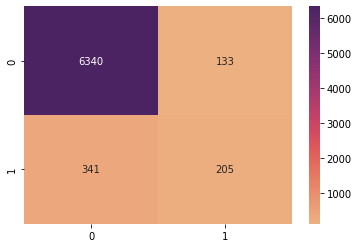

In [162]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='flare', fmt='d')

Podemos ver como afecta a los resultados que el dataset sea imbalanceado, ya que el algoritmo clasifica muy bien para cuando el outcome es no, pero clasifica peor para los outcomes que son si

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6473
           1       0.61      0.38      0.46       546

    accuracy                           0.93      7019
   macro avg       0.78      0.68      0.71      7019
weighted avg       0.92      0.93      0.93      7019



In [164]:
roc_auc_score(y_test, y_pred)

0.6774554941942552

# Grid Search

In [165]:
clf2 = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.937138 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.936920 (0.002811) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936920 (0.002811) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936929 (0.002791) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.936920 (0.002791) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936910 (0.002792) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936920 (0.002790) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.936920 (0.002761) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936910 (0.002768) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936872 (0.002776) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.937100 (0.003073) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.937091 (0.003077) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937138 (0.003196) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.933443 (0.002315) wit

In [166]:
clf_op = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

In [167]:
clf_op.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [168]:
y_pred_op = clf_op.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred_op)

0.9328964239920217

In [170]:
confusion_matrix(y_test,y_pred_op)

array([[6364,  109],
       [ 362,  184]])

In [171]:
print(f'Number of wrong predictions: {109+362}')

Number of wrong predictions: 471


<AxesSubplot:>

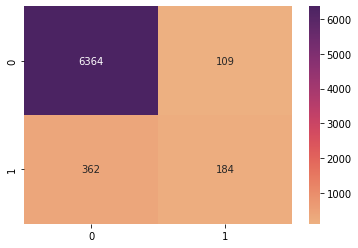

In [172]:
sns.heatmap(confusion_matrix(y_test,y_pred_op), annot=True, cmap='flare', fmt='d')

In [173]:
print(classification_report(y_test, y_pred_op))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6473
           1       0.63      0.34      0.44       546

    accuracy                           0.93      7019
   macro avg       0.79      0.66      0.70      7019
weighted avg       0.92      0.93      0.92      7019



In [174]:
roc_auc_score(y_test,y_pred_op)

0.66007857943591

Conclusiones:

Con grid search solo logre mejorar la predicion para los no, pero empeore en la predicion para los si. Sigue siendo evidente el efecto del dataset desbalanceado